<a href="https://colab.research.google.com/github/HarmanBhutani/ML_projects/blob/main/Assignment2_300144160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import nltk
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from hcluster import pdist, linkage, dendrogram
from numpy.random import randclsut


In [115]:
import contractions
import nltk
from nltk.corpus import stopwords
from autocorrect import Speller
import spacy
import matplotlib.pyplot as plt
import spacy  
from spacy.lang.en import English
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
pip install dedupe_hcluster

     |████████████████████████████████| 532kB 5.6MB/s 


In [57]:
pip install contractions

     |████████████████████████████████| 266kB 5.4MB/s 
     |████████████████████████████████| 327kB 6.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp36-cp36m-linux_x86_64.whl size=84341 sha256=218d846a15c1977a4f291b0d689555dbe8ac1f0a96f7c4456a78196501024383
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [59]:
pip install autocorrect

     |████████████████████████████████| 624kB 5.5MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp36-none-any.whl size=621588 sha256=cc305c5cb0d4651d9ac01691ed77bd6f245a527e1d1bd3dd82c145296749f8b9
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


In [154]:
mat_value = np.array([[0.00,0.90,0.59,0.45,0.65], [0.90,0.00, 0.36,0.53,0.02], [0.59,0.36,0.00,0.56,0.15], [0.45,0.53,0.56,0.00,0.24], [0.65,0.02,0.15,0.24,0.00]])

In [155]:
mat_value

array([[0.  , 0.9 , 0.59, 0.45, 0.65],
       [0.9 , 0.  , 0.36, 0.53, 0.02],
       [0.59, 0.36, 0.  , 0.56, 0.15],
       [0.45, 0.53, 0.56, 0.  , 0.24],
       [0.65, 0.02, 0.15, 0.24, 0.  ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]


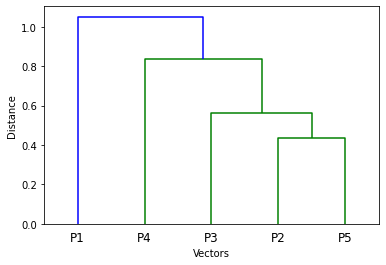

In [157]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import ward, dendrogram



dist_mat = mat_value
linkage_matrix = linkage(dist_mat, "weighted")
dendrogram(linkage_matrix, color_threshold=1, labels=["P1", "P2", "P3","P4","P5"],show_leaf_counts=True)

plt.xlabel('Vectors')
plt.ylabel('Distance')
plt.show()

We can see there are 4 clusters developed in above dendogram.

In [44]:
reuters_raw = pd.read_csv("reuters_news_headlines.csv")
reuters_raw.head(10)

,Date,Headlines,Description
0,2020-06-30,Google postpones U.S. office reopening to Sept...,Alphabet Inc's Google said late on Tuesday it...
1,2020-06-30,Carlyle to buy 25% of Bharti Airtel's data cen...,Carlyle will buy a 25% stake in Indian telecom...
2,2020-06-30,SocGen's Australian securities arm pleads guil...,Australia's corporate regulator on Wednesday s...
3,2020-06-30,"China's factory activity expands, but job loss...",China's factory activity grew at a faster clip...
4,2020-06-30,California accuses Cisco of job discrimination...,California regulators sued Cisco Systems Inc ...
5,2020-06-30,U.S. Senate votes to extend small-business aid...,The U.S. Senate unanimously voted on Tuesday t...
6,2020-06-30,Pandemic sinks Japan business mood to lowest s...,Japanese manufacturers' confidence sank in the...
7,2020-06-30,Goldman's investment bank to increase Black st...,Goldman Sachs Group Inc's investment bank form...
8,2020-06-30,"UAW leader, U.S. prosecutor discuss independen...",The United Auto Workers' president met on Tues...
9,2020-06-30,Mnuchin sees support for crisis loans to hotel...,Up to $140 billion in loans for small business...


In [47]:
reuters_raw['Headlines'].replace('', np.nan, inplace=True)

In [48]:
reuters_raw['Description'].replace('', np.nan, inplace=True)

In [49]:
reuters_raw.isnull().any().any()

False

In [52]:
# Drop duplicated rows
reuters_raw.drop_duplicates(inplace=True)

In [51]:
len(reuters_raw)

1308

Removing Punctuations

In [54]:
reuters_raw['Headlines'] = reuters_raw['Headlines'].str.replace('[^\w\s.]','')
reuters_raw['Headlines']

0       Google postpones U.S. office reopening to Sept...
1       Carlyle to buy 25 of Bharti Airtels data cente...
2       SocGens Australian securities arm pleads guilt...
3       Chinas factory activity expands but job losses...
4       California accuses Cisco of job discrimination...
                              ...                        
1303    Worst may be over for euro zone factories reco...
1304    Hyundai Motors May sales fall sharply yearonye...
1305    Analysts View Impact of the U.S. protests on f...
1306    Workers nervously eye return to Lears coronavi...
1307    Escalating China tensions could become an obst...
Name: Headlines, Length: 1308, dtype: object

In [55]:
reuters_raw['Description'] = reuters_raw['Description'].str.replace('[^\w\s.]','')
reuters_raw['Description']

0       Alphabet Incs  Google said late on Tuesday it ...
1       Carlyle will buy a 25 stake in Indian telecom ...
2       Australias corporate regulator on Wednesday sa...
3       Chinas factory activity grew at a faster clip ...
4       California regulators sued Cisco Systems Inc  ...
                              ...                        
1303    Euro zone manufacturers appear to have passed ...
1304    South Koreas Hyundai Motor Co  said on Monday ...
1305    National Guard troops have been deployed in 15...
1306    Lear Corp is implementing costly safety measur...
1307    U.S. President Donald Trumps directive on Frid...
Name: Description, Length: 1308, dtype: object

Contractions

In [61]:
for i in range (0,len(reuters_raw)):
  reuters_raw['Headlines'][i] = contractions.fix(reuters_raw['Headlines'][i])
  reuters_raw['Description'][i] = contractions.fix(reuters_raw['Description'][i])

Converting text data to lowercase

In [62]:
reuters_raw['Headlines'] = reuters_raw['Headlines'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reuters_raw['Headlines']

0       google postpones you.s. office reopening to se...
1       carlyle to buy 25 of bharti airtels data cente...
2       socgens australian securities arm pleads guilt...
3       chinas factory activity expands but job losses...
4       california accuses cisco of job discrimination...
                              ...                        
1303    worst may be over for euro zone factories reco...
1304    hyundai motors may sales fall sharply yearonye...
1305    analysts view impact of the you.s. protests on...
1306    workers nervously eye return to lears coronavi...
1307    escalating china tensions could become an obst...
Name: Headlines, Length: 1308, dtype: object

In [63]:
reuters_raw['Description'] = reuters_raw['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reuters_raw['Description']

0       alphabet incs google said late on tuesday it w...
1       carlyle will buy a 25 stake in indian telecom ...
2       australias corporate regulator on wednesday sa...
3       chinas factory activity grew at a faster clip ...
4       california regulators sued cisco systems inc o...
                              ...                        
1303    euro zone manufacturers appear to have passed ...
1304    south koreas hyundai motor co said on monday i...
1305    national guard troops have been deployed in 15...
1306    lear corp is implementing costly safety measur...
1307    you.s. president donald trumps directive on fr...
Name: Description, Length: 1308, dtype: object

In [64]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Unzipping tokenizers/punkt.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [65]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [67]:
reuters_raw['Headlines_tokenized'] = reuters_raw['Headlines'].apply(nltk.word_tokenize)
reuters_raw.head()

,Date,Headlines,Description,Headlines_tokenized
0,2020-06-30,google postpones you.s. office reopening to se...,alphabet incs google said late on tuesday it w...,"[google, postpones, you.s, ., office, reopenin..."
1,2020-06-30,carlyle to buy 25 of bharti airtels data cente...,carlyle will buy a 25 stake in indian telecom ...,"[carlyle, to, buy, 25, of, bharti, airtels, da..."
2,2020-06-30,socgens australian securities arm pleads guilt...,australias corporate regulator on wednesday sa...,"[socgens, australian, securities, arm, pleads,..."
3,2020-06-30,chinas factory activity expands but job losses...,chinas factory activity grew at a faster clip ...,"[chinas, factory, activity, expands, but, job,..."
4,2020-06-30,california accuses cisco of job discrimination...,california regulators sued cisco systems inc o...,"[california, accuses, cisco, of, job, discrimi..."


In [70]:
reuters_raw['Headlines_withoutPeriod'] = reuters_raw['Headlines'].str.replace('[^\w\s]','')
reuters_raw['Headlines_withoutPeriod'].head()

0    google postpones yous office reopening to sept...
1    carlyle to buy 25 of bharti airtels data cente...
2    socgens australian securities arm pleads guilt...
3    chinas factory activity expands but job losses...
4    california accuses cisco of job discrimination...
Name: Headlines_withoutPeriod, dtype: object

In [71]:
reuters_raw['Headlines_tokenized'] = reuters_raw['Headlines_withoutPeriod'].apply(nltk.word_tokenize)
reuters_raw.head()

,Date,Headlines,Description,Headlines_tokenized,Headlines_withoutPeriod
0,2020-06-30,google postpones you.s. office reopening to se...,alphabet incs google said late on tuesday it w...,"[google, postpones, yous, office, reopening, t...",google postpones yous office reopening to sept...
1,2020-06-30,carlyle to buy 25 of bharti airtels data cente...,carlyle will buy a 25 stake in indian telecom ...,"[carlyle, to, buy, 25, of, bharti, airtels, da...",carlyle to buy 25 of bharti airtels data cente...
2,2020-06-30,socgens australian securities arm pleads guilt...,australias corporate regulator on wednesday sa...,"[socgens, australian, securities, arm, pleads,...",socgens australian securities arm pleads guilt...
3,2020-06-30,chinas factory activity expands but job losses...,chinas factory activity grew at a faster clip ...,"[chinas, factory, activity, expands, but, job,...",chinas factory activity expands but job losses...
4,2020-06-30,california accuses cisco of job discrimination...,california regulators sued cisco systems inc o...,"[california, accuses, cisco, of, job, discrimi...",california accuses cisco of job discrimination...


In [78]:
stop = stopwords.words('english')

In [79]:
reuters_raw['Headlines_stopwords'] = reuters_raw['Headlines_tokenized'].apply(lambda x: [word for word in x if word not in stop])
reuters_raw.head()

,Date,Headlines,Description,Headlines_tokenized,Headlines_withoutPeriod,Headlines_stopwords
0,2020-06-30,google postpones you.s. office reopening to se...,alphabet incs google said late on tuesday it w...,"[google, postpones, yous, office, reopening, t...",google postpones yous office reopening to sept...,"[google, postpones, yous, office, reopening, s..."
1,2020-06-30,carlyle to buy 25 of bharti airtels data cente...,carlyle will buy a 25 stake in indian telecom ...,"[carlyle, to, buy, 25, of, bharti, airtels, da...",carlyle to buy 25 of bharti airtels data cente...,"[carlyle, buy, 25, bharti, airtels, data, cent..."
2,2020-06-30,socgens australian securities arm pleads guilt...,australias corporate regulator on wednesday sa...,"[socgens, australian, securities, arm, pleads,...",socgens australian securities arm pleads guilt...,"[socgens, australian, securities, arm, pleads,..."
3,2020-06-30,chinas factory activity expands but job losses...,chinas factory activity grew at a faster clip ...,"[chinas, factory, activity, expands, but, job,...",chinas factory activity expands but job losses...,"[chinas, factory, activity, expands, job, loss..."
4,2020-06-30,california accuses cisco of job discrimination...,california regulators sued cisco systems inc o...,"[california, accuses, cisco, of, job, discrimi...",california accuses cisco of job discrimination...,"[california, accuses, cisco, job, discriminati..."


In [80]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [81]:
reuters_raw['Headlines_part_o_speech_tags'] = reuters_raw['Headlines_stopwords'].apply(nltk.tag.pos_tag)
reuters_raw.head()

,Date,Headlines,Description,Headlines_tokenized,Headlines_withoutPeriod,Headlines_stopwords,Headlines_part_o_speech_tags
0,2020-06-30,google postpones you.s. office reopening to se...,alphabet incs google said late on tuesday it w...,"[google, postpones, yous, office, reopening, t...",google postpones yous office reopening to sept...,"[google, postpones, yous, office, reopening, s...","[(google, NN), (postpones, NNS), (yous, JJ), (..."
1,2020-06-30,carlyle to buy 25 of bharti airtels data cente...,carlyle will buy a 25 stake in indian telecom ...,"[carlyle, to, buy, 25, of, bharti, airtels, da...",carlyle to buy 25 of bharti airtels data cente...,"[carlyle, buy, 25, bharti, airtels, data, cent...","[(carlyle, JJ), (buy, VB), (25, CD), (bharti, ..."
2,2020-06-30,socgens australian securities arm pleads guilt...,australias corporate regulator on wednesday sa...,"[socgens, australian, securities, arm, pleads,...",socgens australian securities arm pleads guilt...,"[socgens, australian, securities, arm, pleads,...","[(socgens, NNS), (australian, JJ), (securities..."
3,2020-06-30,chinas factory activity expands but job losses...,chinas factory activity grew at a faster clip ...,"[chinas, factory, activity, expands, but, job,...",chinas factory activity expands but job losses...,"[chinas, factory, activity, expands, job, loss...","[(chinas, JJ), (factory, NN), (activity, NN), ..."
4,2020-06-30,california accuses cisco of job discrimination...,california regulators sued cisco systems inc o...,"[california, accuses, cisco, of, job, discrimi...",california accuses cisco of job discrimination...,"[california, accuses, cisco, job, discriminati...","[(california, NN), (accuses, NNS), (cisco, VBP..."


In [82]:
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [83]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [84]:
reuters_raw['Headlines_wordnet_data'] = reuters_raw['Headlines_part_o_speech_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
reuters_raw.head()

,Date,Headlines,Description,Headlines_tokenized,Headlines_withoutPeriod,Headlines_stopwords,Headlines_part_o_speech_tags,Headlines_wordnet_data
0,2020-06-30,google postpones you.s. office reopening to se...,alphabet incs google said late on tuesday it w...,"[google, postpones, yous, office, reopening, t...",google postpones yous office reopening to sept...,"[google, postpones, yous, office, reopening, s...","[(google, NN), (postpones, NNS), (yous, JJ), (...","[(google, n), (postpones, n), (yous, a), (offi..."
1,2020-06-30,carlyle to buy 25 of bharti airtels data cente...,carlyle will buy a 25 stake in indian telecom ...,"[carlyle, to, buy, 25, of, bharti, airtels, da...",carlyle to buy 25 of bharti airtels data cente...,"[carlyle, buy, 25, bharti, airtels, data, cent...","[(carlyle, JJ), (buy, VB), (25, CD), (bharti, ...","[(carlyle, a), (buy, v), (25, n), (bharti, n),..."
2,2020-06-30,socgens australian securities arm pleads guilt...,australias corporate regulator on wednesday sa...,"[socgens, australian, securities, arm, pleads,...",socgens australian securities arm pleads guilt...,"[socgens, australian, securities, arm, pleads,...","[(socgens, NNS), (australian, JJ), (securities...","[(socgens, n), (australian, a), (securities, n..."
3,2020-06-30,chinas factory activity expands but job losses...,chinas factory activity grew at a faster clip ...,"[chinas, factory, activity, expands, but, job,...",chinas factory activity expands but job losses...,"[chinas, factory, activity, expands, job, loss...","[(chinas, JJ), (factory, NN), (activity, NN), ...","[(chinas, a), (factory, n), (activity, n), (ex..."
4,2020-06-30,california accuses cisco of job discrimination...,california regulators sued cisco systems inc o...,"[california, accuses, cisco, of, job, discrimi...",california accuses cisco of job discrimination...,"[california, accuses, cisco, job, discriminati...","[(california, NN), (accuses, NNS), (cisco, VBP...","[(california, n), (accuses, n), (cisco, v), (j..."


In [85]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [87]:
reuters_raw['Headlines_lemmatized'] = reuters_raw['Headlines_wordnet_data'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
reuters_raw.head()

,Date,Headlines,Description,Headlines_tokenized,Headlines_withoutPeriod,Headlines_stopwords,Headlines_part_o_speech_tags,Headlines_wordnet_data,Headlines_lemmatized
0,2020-06-30,google postpones you.s. office reopening to se...,alphabet incs google said late on tuesday it w...,"[google, postpones, yous, office, reopening, t...",google postpones yous office reopening to sept...,"[google, postpones, yous, office, reopening, s...","[(google, NN), (postpones, NNS), (yous, JJ), (...","[(google, n), (postpones, n), (yous, a), (offi...","[google, postpones, yous, office, reopen, sept..."
1,2020-06-30,carlyle to buy 25 of bharti airtels data cente...,carlyle will buy a 25 stake in indian telecom ...,"[carlyle, to, buy, 25, of, bharti, airtels, da...",carlyle to buy 25 of bharti airtels data cente...,"[carlyle, buy, 25, bharti, airtels, data, cent...","[(carlyle, JJ), (buy, VB), (25, CD), (bharti, ...","[(carlyle, a), (buy, v), (25, n), (bharti, n),...","[carlyle, buy, 25, bharti, airtels, data, cent..."
2,2020-06-30,socgens australian securities arm pleads guilt...,australias corporate regulator on wednesday sa...,"[socgens, australian, securities, arm, pleads,...",socgens australian securities arm pleads guilt...,"[socgens, australian, securities, arm, pleads,...","[(socgens, NNS), (australian, JJ), (securities...","[(socgens, n), (australian, a), (securities, n...","[socgens, australian, security, arm, plead, gu..."
3,2020-06-30,chinas factory activity expands but job losses...,chinas factory activity grew at a faster clip ...,"[chinas, factory, activity, expands, but, job,...",chinas factory activity expands but job losses...,"[chinas, factory, activity, expands, job, loss...","[(chinas, JJ), (factory, NN), (activity, NN), ...","[(chinas, a), (factory, n), (activity, n), (ex...","[chinas, factory, activity, expand, job, loss,..."
4,2020-06-30,california accuses cisco of job discrimination...,california regulators sued cisco systems inc o...,"[california, accuses, cisco, of, job, discrimi...",california accuses cisco of job discrimination...,"[california, accuses, cisco, job, discriminati...","[(california, NN), (accuses, NNS), (cisco, VBP...","[(california, n), (accuses, n), (cisco, v), (j...","[california, accuses, cisco, job, discriminati..."


B

In [102]:
reuters_raw['Headlines_vector']=[" ".join(review) for review in reuters_raw['Headlines_lemmatized'].values]

In [103]:
data_vector = reuters_raw['Headlines_vector'].tolist()
data_vector

['google postpones yous office reopen september virus case spike',
 'carlyle buy 25 bharti airtels data center arm 235 million',
 'socgens australian security arm plead guilty client money offence',
 'chinas factory activity expand job loss quicken amid weak export caixin pmi',
 'california accuses cisco job discrimination base indian employee caste',
 'yous senate vote extend smallbusiness aid program august',
 'pandemic sink japan business mood low since 2009 crisis',
 'goldman investment bank increase black staff hire recruitment',
 'uaw leader yous prosecutor discuss independent oversight union',
 'mnuchin see support crisis loan hotel restaurant',
 'gm must repay 60 million state tax credit ohio ag say',
 'beyond meat sell patty mainland china freshippo store',
 'aeromexico become late latam airline file bankruptcy',
 'fedex share jump 9 quarterly result top expectation',
 'ryanair expect fly 45 million passenger july',
 'airbus cut 15000 job survive coronavirus crisis',
 'airbus 

In [112]:
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer( max_features=20,  max_df=0.75, min_df=3,  norm ='l2', use_idf=True, smooth_idf =True, ngram_range=(1,2))

#Tokenize and build vocab
tfidf_matrix = vectorizer.fit_transform(data_vector)

#Summarize
terms = vectorizer.get_feature_names()

print(tfidf_matrix.shape)
print(vectorizer.vocabulary_)
#print(len(vectorizer.vocabulary_))
print(vectorizer.idf_)

(1308, 20)
{'yous': 19, 'million': 10, 'job': 8, 'pandemic': 13, 'business': 1, 'say': 15, 'china': 3, 'cut': 5, 'coronavirus': 4, 'ceo': 2, 'oil': 12, 'recovery': 14, 'billion': 0, 'may': 9, 'wirecard': 18, 'source': 16, 'new': 11, 'exclusive': 7, 'stock': 17, 'deal': 6}
[3.69968195 4.41581865 4.32687116 4.15166708 3.95751106 4.18803472
 4.18803472 4.20672685 4.11657576 4.34837737 4.39282913 4.0826742
 4.24519313 4.15166708 4.39282913 3.22825888 3.91433889 4.34837737
 4.24519313 2.69637984]


C

In [116]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.40922318],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.40922318],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40922318, 0.        , 0.        , ..., 0.40922318, 0.        ,
        1.        ]])

In [117]:
Headline_dist_mat = distance_matrix(cosine_sim, cosine_sim)
Headline_dist_mat

array([[ 0.        , 13.57228929, 12.37617357, ...,  0.        ,
        12.37617357,  8.92345354],
       [13.57228929,  0.        ,  5.9694902 , ..., 13.57228929,
         5.9694902 ,  9.7517875 ],
       [12.37617357,  5.9694902 ,  0.        , ..., 12.37617357,
         0.        ,  7.83223651],
       ...,
       [ 0.        , 13.57228929, 12.37617357, ...,  0.        ,
        12.37617357,  8.92345354],
       [12.37617357,  5.9694902 ,  0.        , ..., 12.37617357,
         0.        ,  7.83223651],
       [ 8.92345354,  9.7517875 ,  7.83223651, ...,  8.92345354,
         7.83223651,  0.        ]])

D

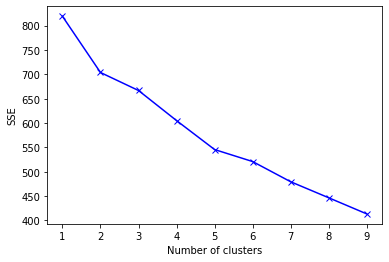

In [118]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = tfidf_matrix
SSE = [] 

K = range(1,10)
for k in K: 
    kmeans = KMeans(n_clusters = k, init='k-means++' )
    kmeans.fit(X) 
    SSE.append(kmeans.inertia_)

plt.plot(K, SSE, 'bx-') 
plt.xlabel('Number of clusters') 
plt.ylabel('SSE') 
plt.show() 


In [119]:

from sklearn.cluster import KMeans

num_clusters = 8

#Run clustering algorithm
km = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init=100)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:

ranks = []
for i in range(1, len(data_vector)+1):
    ranks.append(i)

In [124]:
#final clusters
clusters = km.labels_.tolist()
complaints_data = { 'rank': ranks, 'complaints':data_vector , 'cluster': clusters }
frame = pd.DataFrame(complaints_data, index = [clusters] , columns = ['rank', 'cluster'])

#number of docs per cluster
frame['cluster'].value_counts()

0    704
3    172
2    117
6     84
7     71
1     64
4     51
5     45
Name: cluster, dtype: int64

In [ ]:

random_state = 0 


pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(tfidf_headlines.toarray())

reduced_cluster_centers = pca.transform(km.cluster_centers_)

E

In [125]:

# for reproducibility
random_state = 0 

# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(km.cluster_centers_)

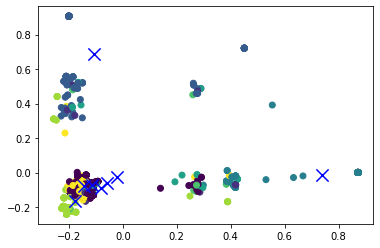

In [126]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(tfidf_matrix))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(data_vector)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,10,100,1000,10000,100000,1020,103,109,10day,10th,10year,11,11095,11year,12,1200,13,14,140,15,1500,15000,16,1680,17,175,18,19,1998,1billioneuro,1mdb,20,200,20000,2009,2020,2021,2022,2025,2030,...,workforce,world,worldwide,worried,worry,worsens,worst,worth,would,wrestle,writedown,wsj,wto,wwd,xiidra,year,yearend,yearonyear,yeezy,yet,yield,york,yous,yousbased,youschina,yousfacing,youslisted,youtube,yum,zeitung,zero,zomato,zone,zoom,zoox,zte,zuckerberg,zuckerbergs,zuercher,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.025837,0.0,0.0,0.024655,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.075490,0.0,0.0,0.0,0.031364,0.000000,0.000000,0.000000,0.091767,0.024365,0.000000,0.000000,0.021614,0.0,0.024514,0.0,0.0,0.000000,...,0.00000,0.000000,0.0,0.026986,0.023415,0.148275,0.000000,0.029143,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.023087,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.031212,0.0,0.025897
1,0.000000,1.000000,0.090306,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.046846,0.000000,0.000000,0.0,0.061053,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.053829,0.079854,0.000000,0.000000,0.049989,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.072275,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.055316,0.0,0.0,0.054913,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.090306,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085871,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.118037,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.039708,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.053502,0.116379,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.080096,0.048726,0.043191,0.046058,0.000000,0.000000,0.061845,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.116141,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.047330,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.092224,0.0,0.0,0.000000,0.000000,0.228241,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.039708,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.057343,0.051843,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.052223,0.046291,0.049365,0.000000,0.000000,0.066284,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.050728,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0.000000,0.000000,0.000000,0.228241,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.0,0.073286,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.

In [132]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2','Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,641,700,0,2
1,77,79,0,2
2,1012,1102,0,2
3,1051,1101,0.3557,2
4,944,1135,0.39301,2
...,...,...,...,...
1302,2534,2606,7.48269,771
1303,2568,2610,7.58669,815
1304,2609,2611,7.74786,1212
1305,2607,2612,8.32073,1275


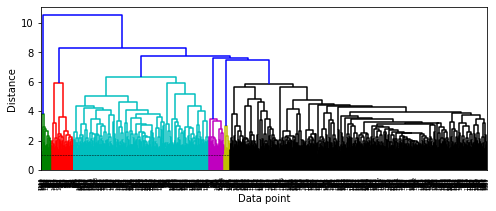

In [138]:
plt.figure(figsize=(8, 3))
plt.title = ('Hierarchical Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)